-0.0011177120763738342 0.012521273469374457 0.0233969208855838 0.041169040247676966


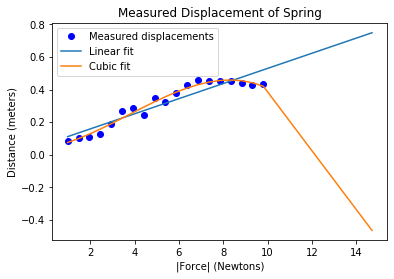

In [17]:
import matplotlib.pylab as pylab
import random as rd

def getData(filename):
    dataFile=open(filename,'r')
    distances=[]
    masses=[]
    discardHeader=dataFile.readline()
    for line in dataFile:
        d, m =line.split()
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)

def plotData(filename):
    Xvals, Yvals =getData(filename)
    xVals = pylab.array(Xvals)     
    yVals = pylab.array(Yvals) 
    xVals = xVals*9.81  #acc. due to gravity
    pylab.plot(xVals, yVals, 'bo', label = 'Measured displacements')    
    pylab.title('Measured Displacement of Spring')     
    pylab.xlabel('|Force| (Newtons)')     
    pylab.ylabel('Distance (meters)') 
    
#getData('springData.txt')
#plotData('springData.txt')

def fitData(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81
    pylab.plot(xVals, yVals, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    a,b = pylab.polyfit(xVals, yVals, 1)
    estYVals = a*pylab.array(xVals) + b
    k = 1/a
    pylab.plot(xVals, estYVals, label = 'Linear fit, k = '
               + str(round(k, 5)))
    pylab.legend(loc = 'best')
    
def fitData1(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81
    pylab.plot(xVals, yVals, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    a,b = pylab.polyfit(xVals, yVals, 1)
    estYVals = a*pylab.array(xVals) + b
    #pylab.plot(xVals, estYVals, label = 'Linear fit')
    a,b,c,d = pylab.polyfit(xVals, yVals, 3)
    estYVals = a*(xVals**3) + b*xVals**2 + c*xVals + d
    pylab.plot(xVals, estYVals, label = 'Cubic fit')
    pylab.legend(loc = 'best')

def fitData2(fileName):
    xVals, yVals = getData(fileName)
    extX = pylab.array(xVals + [1.5])
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81
    extX = extX*9.81
    pylab.plot(xVals, yVals, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    a,b = pylab.polyfit(xVals, yVals, 1)
    extY = a*pylab.array(extX) + b
    pylab.plot(extX, extY, label = 'Linear fit')
    a,b,c,d = pylab.polyfit(xVals, yVals, 3)
    extY = a*(extX**3) + b*extX**2 + c*extX + d
    pylab.plot(extX, extY, label = 'Cubic fit')
    pylab.legend(loc = 'best')
    print(a,b,c,d)

fitData2('springData.txt')   
#fitData('springData.txt')
#fitData1('springData.txt')





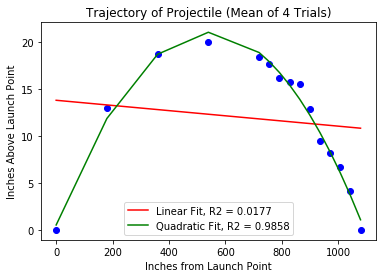

In [9]:
import matplotlib.pylab as pylab
import random as rd

def getTrajectoryData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    heights1, heights2, heights3, heights4 = [],[],[],[]
    discardHeader = dataFile.readline()
    for line in dataFile:
        d, h1, h2, h3, h4 = line.split()
        distances.append(float(d))
        heights1.append(float(h1))
        heights2.append(float(h2))
        heights3.append(float(h3))
        heights4.append(float(h4))
    dataFile.close()
    return (distances, [heights1, heights2, heights3, heights4])

#getTrajectoryData('launcherData.txt')

def tryFits(fName):
    distances, heights = getTrajectoryData(fName)
    
    distances = pylab.array(distances)*36
    totHeights = pylab.array([0]*len(distances))
   
    for h in heights:
        totHeights = totHeights + pylab.array(h)
       
    pylab.title('Trajectory of Projectile (Mean of 4 Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    meanHeights = totHeights/float(len(heights))
   
    pylab.plot(distances, meanHeights, 'bo')
    a,b = pylab.polyfit(distances, meanHeights, 1)
    altitudes = a*distances + b
    pylab.plot(distances, altitudes, 'r',
               label = 'Linear Fit')
    a,b,c = pylab.polyfit(distances, meanHeights, 2)
    altitudes = a*(distances**2) + b*distances + c
    pylab.plot(distances, altitudes, 'g',
               label = 'Quadratic Fit')
    pylab.legend()

#tryFits('launcherData.txt')

def rSquare(measured, estimated):
    """measured: one dimensional array of measured values
       estimate: one dimensional array of predicted values"""
    EE = ((estimated - measured)**2).sum()
    mMean = measured.sum()/float(len(measured))
    MV = ((mMean - measured)**2).sum()
    return 1 - EE/MV

def tryFits1(fName):
    distances, heights = getTrajectoryData(fName)
    distances = pylab.array(distances)*36
    totHeights = pylab.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    pylab.title('Trajectory of Projectile (Mean of 4 Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    meanHeights = totHeights/float(len(heights))
    pylab.plot(distances, meanHeights, 'bo')
    a,b = pylab.polyfit(distances, meanHeights, 1)
    altitudes = a*distances + b
    pylab.plot(distances, altitudes, 'r',
               label = 'Linear Fit' + ', R2 = '
               + str(round(rSquare(meanHeights, altitudes), 4)))
    a,b,c = pylab.polyfit(distances, meanHeights, 2)
    altitudes = a*(distances**2) + b*distances + c
    pylab.plot(distances, altitudes, 'g',
               label = 'Quadratic Fit' + ', R2 = '
               + str(round(rSquare(meanHeights, altitudes), 4)))
    pylab.legend()

tryFits1('launcherData.txt')